In [1]:
from random import gauss
from random import seed
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# gauss()
This function belongs to the **random** Python package. 

It is used to return a random floating point number with gaussian distribution

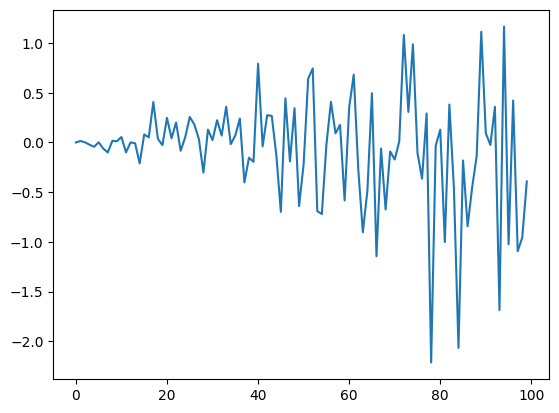

In [2]:
# Seed pseudorandom number generator
seed(1)
# Create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# Plot
plt.plot(data)
plt.show()

When applying an Autoregressive Conditional Heteroskedasticity (ARCH) model, it's common to examine the autocorrelation function (ACF) of the squared residuals in this case, just synthetic data). 

The reason for squaring the data before calculating the ACF is related to the nature of ARCH models and their focus on modeling volatility or variance clustering.

The ARCH model assumes that the conditional variance of a time series is related to past squared observations (residuals). 

** By squaring the data, you are essentially focusing on the volatility or variability of the series rather than the raw values. **

The idea is that financial time series data often exhibits volatility clustering, meaning that periods of high volatility tend to be followed by other periods of high volatility, and the same is true for low volatility periods

# plot_acf()
In Python, this function requires a **Numpy array**, not raw data

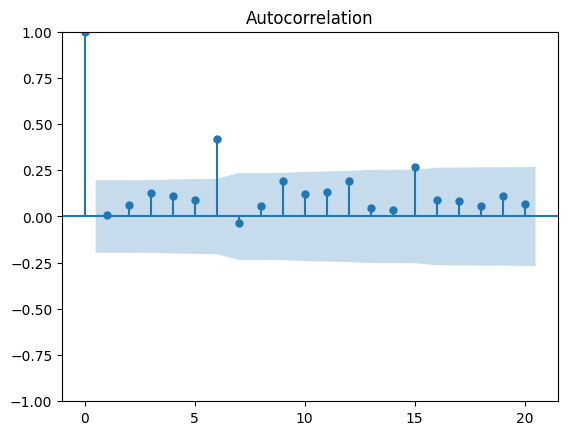

In [3]:
data = np.array(data)
squared_data = data**2
# Create ACF plot
plot_acf(squared_data)
plt.show()

# ARCH Model
Developing an ARCH model involves three steps:

* Define the model
* Fit the model
* Make a forecast.

Before fitting and forecasting, we can split the dataset into a train and test set so that we can fit the model on the train and evaluate its performance on the test set.

In [4]:
# Split into train and test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

The **arch_model()** function specifically allows you to specify and estimate **ARCH** and **GARCH** (Generalized Autoregressive Conditional Heteroskedasticity) models. The format is:

In a Python sense, a complete ARCH model is divided into three components:

* a mean model, e.g., a constant mean or an ARX;

* a volatility process, e.g., a GARCH or an EGARCH process; and

* a distribution for the standardized residuals.

While models can be carefully specified using the individual components, most common specifications can be specified using a simple model constructor.

arch.univariate.arch_model(y, x=None, mean='Constant', lags=0, vol='GARCH', p=1, o=0, q=1, power=2.0, dist='normal', hold_back=None, rescale=None)

y : {ndarray, Series, None}
The dependent variable

x : {np.array, DataFrame}, optional
Exogenous regressors. Ignored if model does not permit exogenous regressors.

mean : str, optional
Name of the mean model. Currently supported options are: ‘Constant’, ‘Zero’, ‘LS’, ‘AR’, ‘ARX’, ‘HAR’ and ‘HARX’

lags : int or list (int), optional
Either a scalar integer value indicating lag length or a list of integers specifying lag locations.

vol : str, optional
Name of the volatility model. Currently supported options are: ‘GARCH’ (default), ‘ARCH’, ‘EGARCH’, ‘FIGARCH’, ‘APARCH’ and ‘HARCH’

p : int, optional
Lag order of the symmetric innovation

o : int, optional
Lag order of the asymmetric innovation

q : int, optional
Lag order of lagged volatility or equivalent

power : float, optional
Power to use with GARCH and related models

dist : int, optional
Name of the error distribution. Currently supported options are:

Normal: ‘normal’, ‘gaussian’ (default)

Students’s t: ‘t’, ‘studentst’

Skewed Student’s t: ‘skewstudent’, ‘skewt’

Generalized Error Distribution: ‘ged’, ‘generalized error”

hold_back : int
Number of observations at the start of the sample to exclude when estimating model parameters. Used when comparing models with different lag lengths to estimate on the common sample.

rescale : bool
Flag indicating whether to automatically rescale data if the scale of the data is likely to produce convergence issues when estimating model parameters. If False, the model is estimated on the data without transformation. If True, than y is rescaled and the new scale is reported in the estimation results.


# Is there a relationship between ARCH/GARCH and ARMA?
While both ARCH (Autoregressive Conditional Heteroskedasticity) and ARMA (Autoregressive Moving Average) models are used in time series analysis, they address different aspects of the data. The ARCH model is not a direct generalization of the ARMA model; they serve distinct purposes in modeling time series.

# ARMA Model:
The ARMA model combines **autoregressive (AR)** and **moving average (MA)** components to model the mean of a time series. The **AR** component captures the **linear dependence on past observations**, while the **MA** component models the **linear dependence on past white noise or error terms**. The **ARMA** model is primarily concerned with capturing **patterns in the mean** of the time series.

# ARCH Model:
On the other hand, the **ARCH** model is specifically designed **to model volatility clustering or the changing variance** of a time series. It focuses on capturing the **conditional heteroskedasticity**, meaning that the **variance of the error term is not constant over time but varies based on past squared observations (volatility)**. The ARCH model is often used in finance to model changing levels of volatility in asset returns.

# Relationship:
Although ARCH and ARMA models serve different purposes, there is a connection between them.

Integrated **GARCH** (Generalized Autoregressive Conditional Heteroskedasticity) models, which extend the basic ARCH model, **can incorporate ARMA components to model both the mean and volatility of a time series**. In this sense, an integrated GARCH model can be seen as a more comprehensive model that combines aspects of both ARCH and ARMA.

In summary, while ARCH and ARMA models are related and can be combined in certain contexts, they are not straightforward generalizations of each other. The ARCH model specifically addresses volatility clustering, which is not the primary focus of the ARMA model.

A model can be defined by calling the **arch_model()** function.

We can specify a model for the mean of the series: in this case mean=’Zero’ is an appropriate model. 

We can then specify the **model for the variance**: in this case **vol=’ARCH’**. 

We can also specify the **lag parameter** for the ARCH model: in this case **p=15**.


In [5]:
from arch import arch_model
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)

In [11]:
# Fit model
fitted_model = model.fit()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 88214.15274343832
Iteration:      2,   Func. Count:     36,   Neg. LLF: 145.16327370105464
Iteration:      3,   Func. Count:     54,   Neg. LLF: 128.0887135967567
Iteration:      4,   Func. Count:     72,   Neg. LLF: 109.21731760967693
Iteration:      5,   Func. Count:     90,   Neg. LLF: 36.505726167454
Iteration:      6,   Func. Count:    108,   Neg. LLF: 39.65736210558854
Iteration:      7,   Func. Count:    126,   Neg. LLF: 28.719728253674663
Iteration:      8,   Func. Count:    143,   Neg. LLF: 28.02026266328528
Iteration:      9,   Func. Count:    161,   Neg. LLF: 34.947196664051255
Iteration:     10,   Func. Count:    180,   Neg. LLF: 30.036300450060104
Iteration:     11,   Func. Count:    198,   Neg. LLF: 26.916781932894732
Iteration:     12,   Func. Count:    216,   Neg. LLF: 35.23299744647749
Iteration:     13,   Func. Count:    235,   Neg. LLF: 25.557794001217236
Iteration:     14,   Func. Count:    253,   Neg. LLF: 25.49

In [12]:
print(fitted_model)

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                       ARCH   Log-Likelihood:               -25.4775
Distribution:                  Normal   AIC:                           82.9550
Method:            Maximum Likelihood   BIC:                           122.952
                                        No. Observations:                   90
Date:                Sun, Jun 30 2024   Df Residuals:                       90
Time:                        20:06:15   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.5741e-03  1.871e-02      0.191      0.848 

# Forecast
Finally, we can make a prediction by calling the forecast() function on the fit model. We can specify the horizon for the forecast.

In this case, we will predict the variance for the last 10 time steps of the dataset, and withhold them from the training of the model.

In [13]:
# Forecast the test set
yhat = fitted_model.forecast(horizon=n_test)
print(yhat.variance.values)
print(yhat.variance.values[0, :])

[[2.09288589 0.09017704 1.30488415 1.06125941 0.25690557 0.8599341
  1.82286951 0.39067782 1.13007601 0.91277481]]
[2.09288589 0.09017704 1.30488415 1.06125941 0.25690557 0.8599341
 1.82286951 0.39067782 1.13007601 0.91277481]


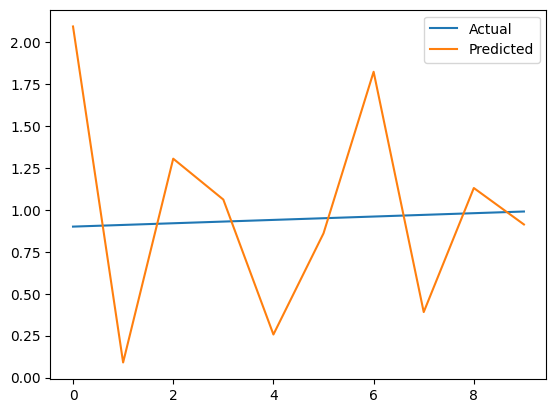

In [18]:
# Plot actual variance
var = [i*0.01 for i in range(0,100)]
plt.plot(var[-n_test:], label='Actual')
# Plot forecast variance
#plt.plot(yhat.variance.values[-1, :])
plt.plot(yhat.variance.values[0, :], label='Predicted')
plt.legend()
plt.show()

Running the example defines and fits the model then predicts the variance for the last 10 time steps of the dataset.

A line plot is created comparing the series of expected variance to the predicted variance. Although the model was not tuned, the predicted variance looks reasonable.

# GARCH Model
We can fit a GARCH model just as easily using the arch library.

The arch_model() function can specify a GARCH instead of ARCH model vol=’GARCH’ as well as the lag parameters for both.

In [20]:
# Define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

The dataset may not be a good fit for a GARCH model given the linearly increasing variance, nevertheless, the complete example is listed below.

Iteration:      1,   Func. Count:     33,   Neg. LLF: 134.2317665883839
Iteration:      2,   Func. Count:     70,   Neg. LLF: 95088.3398100521
Iteration:      3,   Func. Count:    103,   Neg. LLF: 544.0686542051735
Iteration:      4,   Func. Count:    136,   Neg. LLF: 359.74467197626797
Iteration:      5,   Func. Count:    169,   Neg. LLF: 120.68429190701761
Iteration:      6,   Func. Count:    202,   Neg. LLF: 57.67984556619349
Iteration:      7,   Func. Count:    235,   Neg. LLF: 37.23386320586698
Iteration:      8,   Func. Count:    268,   Neg. LLF: 44.284722021361496
Iteration:      9,   Func. Count:    301,   Neg. LLF: 30.955293097511912
Iteration:     10,   Func. Count:    334,   Neg. LLF: 26.9576030443107
Iteration:     11,   Func. Count:    366,   Neg. LLF: 31.358756978286806
Iteration:     12,   Func. Count:    400,   Neg. LLF: 30.014724862032015
Iteration:     13,   Func. Count:    433,   Neg. LLF: 28.461775603736843
Iteration:     14,   Func. Count:    466,   Neg. LLF: 27.69

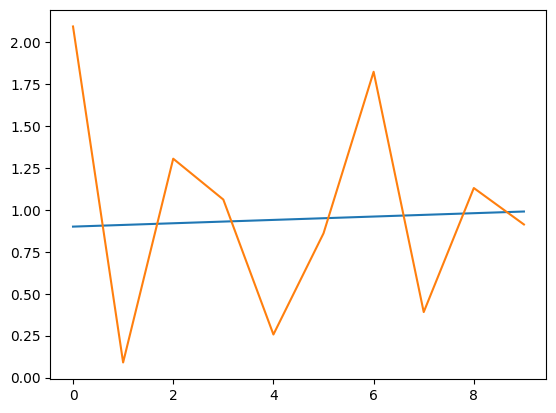

In [21]:
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
plt.plot(var[-n_test:])
# plot forecast variance
plt.plot(yhat.variance.values[0, :])
plt.show()